In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df=pd.read_csv('data/corrupted train data.csv',low_memory=False)
test_df=pd.read_csv('data/corrupted test data.csv',low_memory=False)
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
cols_to_fix = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment',
               'Changed_Credit_Limit','Outstanding_Debt',
               'Amount_invested_monthly','Monthly_Balance']

for col in cols_to_fix:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [8]:
train_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.000000,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000
mean,110.934505,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.551258
std,689.407864,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.925499
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,161.224249,236.815814,470.262938
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


<Axes: >

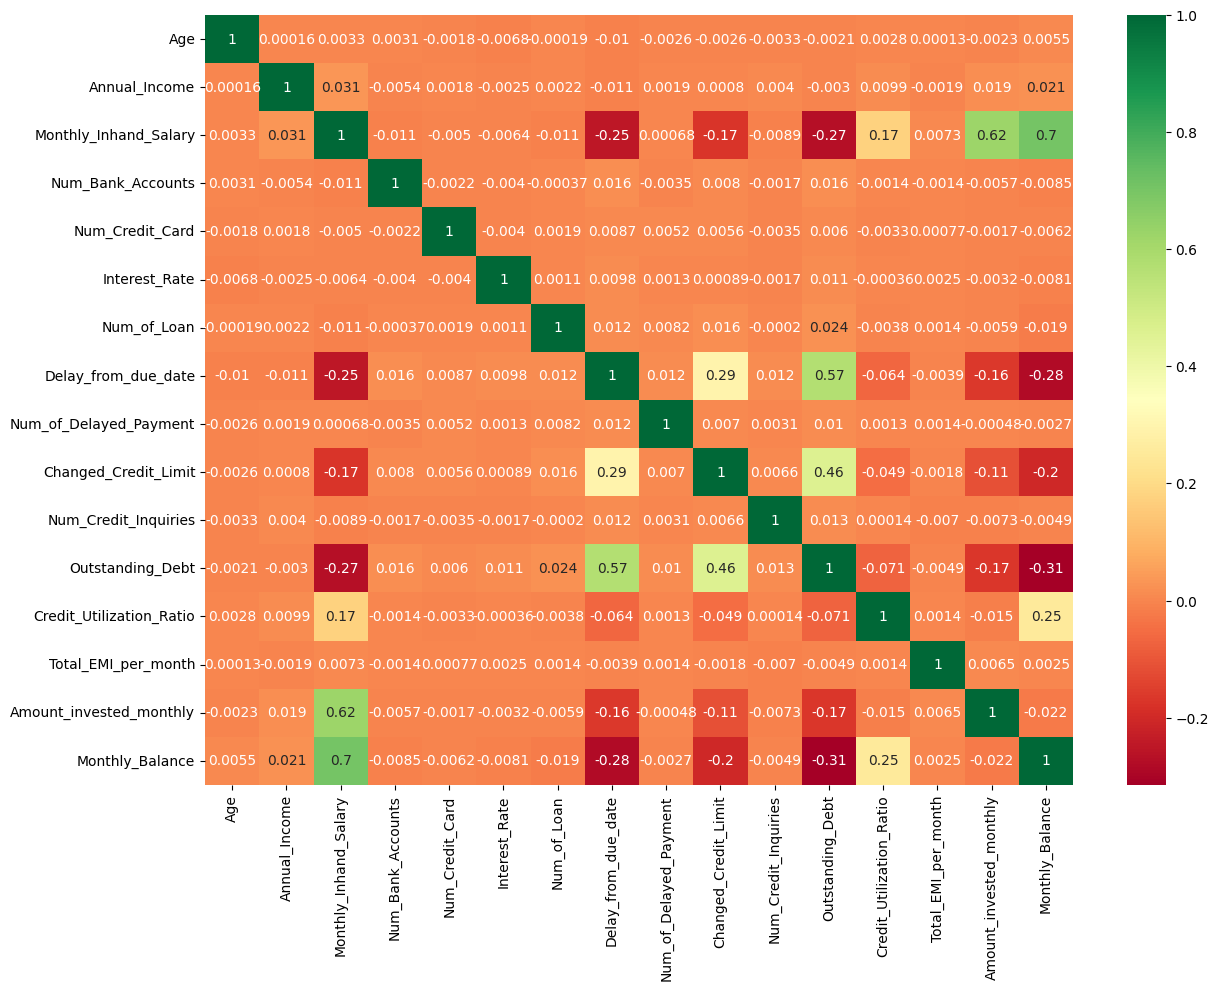

In [9]:
fig,ax=plt.subplots(figsize=(14,10))
sns.heatmap(data=train_df.select_dtypes(include=np.number).corr(),annot=True,cmap='RdYlGn')

In [10]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
train_df['Month_no'] = train_df['Month'].map(month_map)

In [11]:
train_df['Num_Bank_Accounts_Unknown']=(train_df['Num_Bank_Accounts']==-1).astype(int)

In [12]:
def clean_data(min_value,max_value,df,col):
    df.loc[(df[col]>max_value)|(df[col] <min_value),col]=np.nan   

In [13]:
clean_data(0,100,train_df,'Age')

In [14]:

clean_data(0,20,train_df,'Num_Bank_Accounts')
clean_data(0,15,train_df,'Num_Credit_Card')
clean_data(0,40,train_df,'Interest_Rate')
clean_data(0,10,train_df,'Num_of_Loan')
clean_data(0,35,train_df,'Delay_from_due_date')
clean_data(0,35,train_df,'Num_of_Delayed_Payment')
clean_data(0,25,train_df,'Changed_Credit_Limit')
clean_data(0,15,train_df,'Num_Credit_Inquiries')

In [15]:
train_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_no,Num_Bank_Accounts_Unknown
count,92370.000000,9.302000e+04,84998.000000,98665.000000,97732.000000,97966.000000,90892.000000,83970.000000,88915.000000,92622.000000,95645.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000,100000.000000,100000.00000
mean,33.317581,1.785790e+05,4194.170850,5.369108,5.533612,14.531603,3.534172,16.068191,13.424529,9.916198,5.699085,1426.503700,32.285173,1403.118217,195.539456,402.551258,4.500000,0.00021
std,10.779987,1.442878e+06,3183.686167,2.592749,2.068336,8.739748,2.447488,8.812201,6.207212,5.794194,3.760597,1155.045753,5.116875,8306.041270,199.564527,213.925499,2.291299,0.01449
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,1.000000,0.00000
25%,24.000000,1.943560e+04,1625.568229,3.000000,4.000000,7.000000,2.000000,9.000000,9.000000,5.380000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630,2.750000,0.00000
50%,33.000000,3.755074e+04,3093.745000,5.000000,5.000000,13.000000,3.000000,15.000000,14.000000,9.250000,5.000000,1166.370000,32.305784,69.249473,128.954538,336.731225,4.500000,0.00000
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.000000,20.000000,5.000000,23.000000,18.000000,13.990000,8.000000,1948.200000,36.496663,161.224249,236.815814,470.262938,6.250000,0.00000
max,100.000000,2.419806e+07,15204.633333,18.000000,15.000000,34.000000,9.000000,35.000000,28.000000,25.000000,15.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519,8.000000,1.00000


In [16]:
train_df['Occupation']=train_df['Occupation'].replace('_______','Unknown')
train_df['Occupation'].unique()

array(['Scientist', 'Unknown', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [17]:

train_df['Credit_History_Age'] = train_df['Credit_History_Age'].fillna('0 Years and 0 Months')

def safe_split(x):
    d = x.split()
    if len(d) >= 4: # Standard format: ['22', 'Years', 'and', '1', 'Month']
        return int(d[0]) * 12 + int(d[3])
    return 0 # Or the median

train_df['Credit_History_Months'] = train_df['Credit_History_Age'].apply(safe_split)

In [18]:
input_cols=['Age','Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio','Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Month_no', 'Num_Bank_Accounts_Unknown',
       'Credit_History_Months']
target_col='Credit_Score'

In [19]:
from sklearn.model_selection import train_test_split
train_set,val_set=train_test_split(train_df,test_size=0.2,random_state=42,stratify=train_df[target_col])

In [20]:
train_inputs=train_set[input_cols].copy()
val_inputs=val_set[input_cols].copy()
train_target=train_set[target_col].copy()
val_target=val_set[target_col].copy()

In [21]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols=train_inputs.select_dtypes(include='object').columns.tolist()

In [22]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(train_inputs[numeric_cols])

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [23]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_inputs[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [25]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.fit(train_inputs[cat_cols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [27]:
encoded_cols=enc.get_feature_names_out(cat_cols).tolist()
train_inputs[encoded_cols]=enc.transform(train_inputs[cat_cols])
val_inputs[encoded_cols]=enc.transform(val_inputs[cat_cols])

In [28]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]

In [29]:
train_df[target_col].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def model_evaluate(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_val)
    train_acc=accuracy_score(train_target,train_preds)
    val_acc=accuracy_score(val_target,val_preds)
    train_prec=precision_score(train_target,train_preds,average='weighted')   
    val_prec=precision_score(val_target,val_preds,average='weighted')
    train_rec=recall_score(train_target,train_preds,average='weighted')   
    val_rec=recall_score(val_target,val_preds,average='weighted')   
    train_f1=f1_score(train_target,train_preds,average='weighted')
    val_f1=f1_score(val_target,val_preds,average='weighted')
    print(f'Train Results: Acc ==> {train_acc}, Precision ==>{train_prec},Recall ==> {train_rec},F1 ==> {train_f1}')
    print(f'Val Results: Acc ==> {val_acc}, Precsion ==>{val_prec}, Recall ==> {val_rec},F1 ==>{val_f1}')

In [31]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(max_iter=2000,class_weight='balanced')
model_log.fit(x_train,train_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [32]:
model_evaluate(model_log)

Train Results: Acc ==> 0.644425, Precision ==>0.6906600830017581,Recall ==> 0.644425,F1 ==> 0.6484719649100276
Val Results: Acc ==> 0.6439, Precsion ==>0.6907838528278776, Recall ==> 0.6439,F1 ==>0.6479313080129968


In [33]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(max_depth=10,random_state=42,class_weight='balanced')
model_tree.fit(x_train,train_target)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [34]:
model_evaluate(model_tree)

Train Results: Acc ==> 0.6964, Precision ==>0.7488431656516109,Recall ==> 0.6964,F1 ==> 0.7007452787128156
Val Results: Acc ==> 0.6746, Precsion ==>0.7255306252393758, Recall ==> 0.6746,F1 ==>0.6786813404726497


In [35]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(n_jobs=-1,n_estimators=150,max_depth=35,random_state=42,class_weight='balanced',min_samples_leaf=12)
model_forest.fit(x_train,train_target)

,n_estimators,150
,criterion,'gini'
,max_depth,35
,min_samples_split,2
,min_samples_leaf,12
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
model_evaluate(model_forest) #Random Forest performs the best 

Train Results: Acc ==> 0.75075, Precision ==>0.7925118775461256,Recall ==> 0.75075,F1 ==> 0.7549793025323199
Val Results: Acc ==> 0.7028, Precsion ==>0.7497525277804709, Recall ==> 0.7028,F1 ==>0.7065016048822714


In [37]:
df=pd.DataFrame({'cols':x_train.columns,'imp':model_forest.feature_importances_}).sort_values(by='imp',ascending=False).head(10)

In [39]:
df

,cols,imp
11,Outstanding_Debt,0.153223
5,Interest_Rate,0.100051
36,Credit_Mix_Good,0.065771
7,Delay_from_due_date,0.057754
40,Payment_of_Min_Amount_No,0.053007
37,Credit_Mix_Standard,0.052303
41,Payment_of_Min_Amount_Yes,0.045116
10,Num_Credit_Inquiries,0.043894
4,Num_Credit_Card,0.042080
18,Credit_History_Months,0.041491
